In [2]:
# !pip install mne
# !pip install pandas
# !pip install odfpy

In [3]:
import mne
import numpy as np 
import glob
import matplotlib.pyplot as plt 
import pandas as pd 

In [4]:
import os 
os.chdir('../..')

In [5]:
# data_path = '../../data/chronic_pain_patients/chronic_back_pain/preprocessed/'

In [6]:
# load data
bids_fname = r'data/chronic_pain_patients/chronic_back_pain/preprocessed/Exp_eyes_closed_vp02_eyes_closed.vhdr'
raw = mne.io.read_raw_brainvision(bids_fname)

bids_fname_healthy = r'data/healthy_controls/preprocessed/Exp_eyes_closed_vpH08_eyes_closed.vhdr'
raw_healthy = mne.io.read_raw_brainvision(bids_fname_healthy)

Extracting parameters from data/chronic_pain_patients/chronic_back_pain/preprocessed/Exp_eyes_closed_vp02_eyes_closed.vhdr...
Setting channel info structure...
Extracting parameters from data/healthy_controls/preprocessed/Exp_eyes_closed_vpH08_eyes_closed.vhdr...
Setting channel info structure...


/tmp/ipykernel_1573686/3901248068.py:3: RuntimeWarning: No coordinate information found for channels ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(bids_fname)
/tmp/ipykernel_1573686/3901248068.py:3: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2',

In [7]:
# raw.info

In [15]:
# montage = mne.channels.make_standard_montage('standard_1020')
# raw.set_montage(montage)
# raw.plot_sensors(show_names=True)

In [1]:
raw.plot_psd()

NameError: name 'raw' is not defined

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Setting 3901 of 300005 (1.30%) samples to NaN, retaining 296104 (98.70%) samples.
Effective window size : 2.048 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


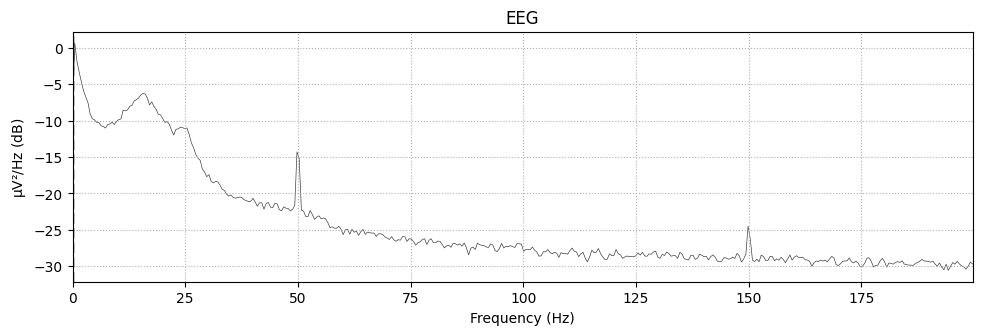

In [14]:
raw_healthy.plot_psd(fmax=200)

Effective window size : 0.256 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


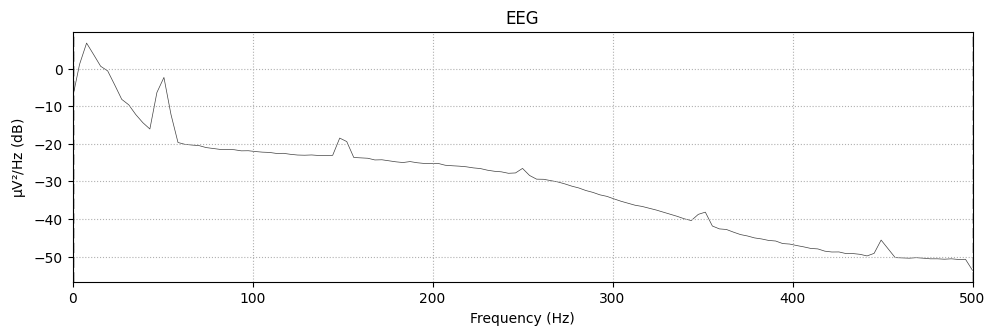

In [10]:
raw.compute_psd().plot()

Setting 3901 of 300005 (1.30%) samples to NaN, retaining 296104 (98.70%) samples.
Effective window size : 0.256 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


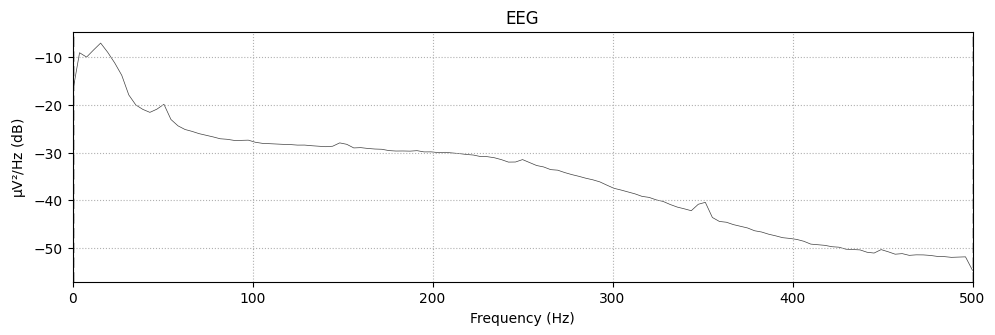

In [16]:
raw_healthy.compute_psd().plot()

Using matplotlib as 2D backend.


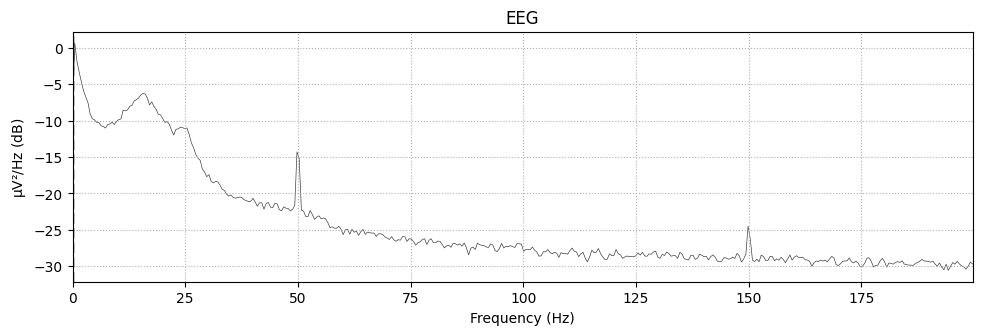

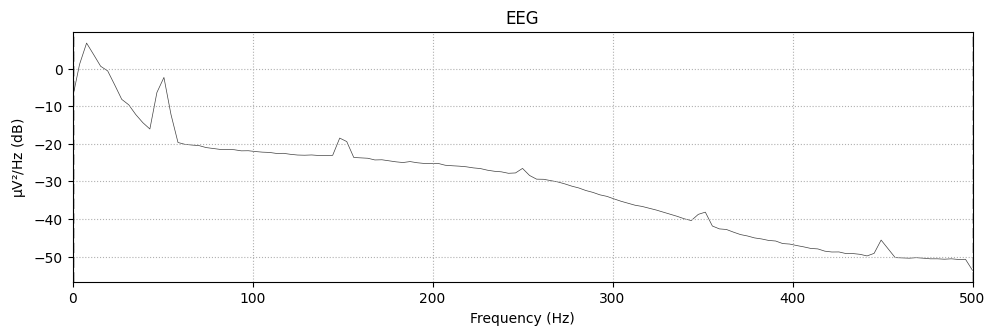

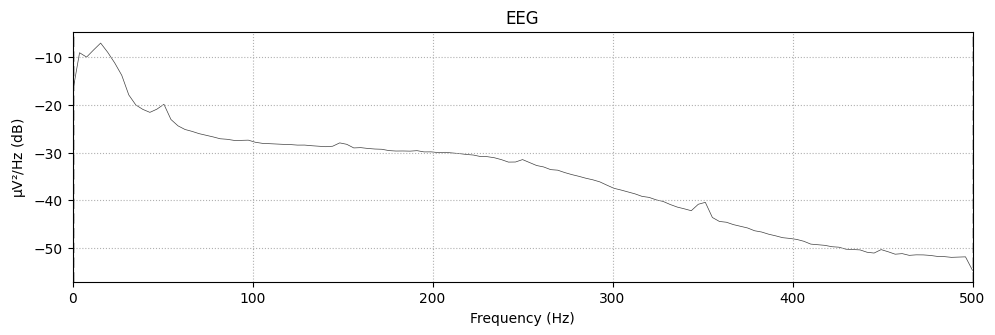

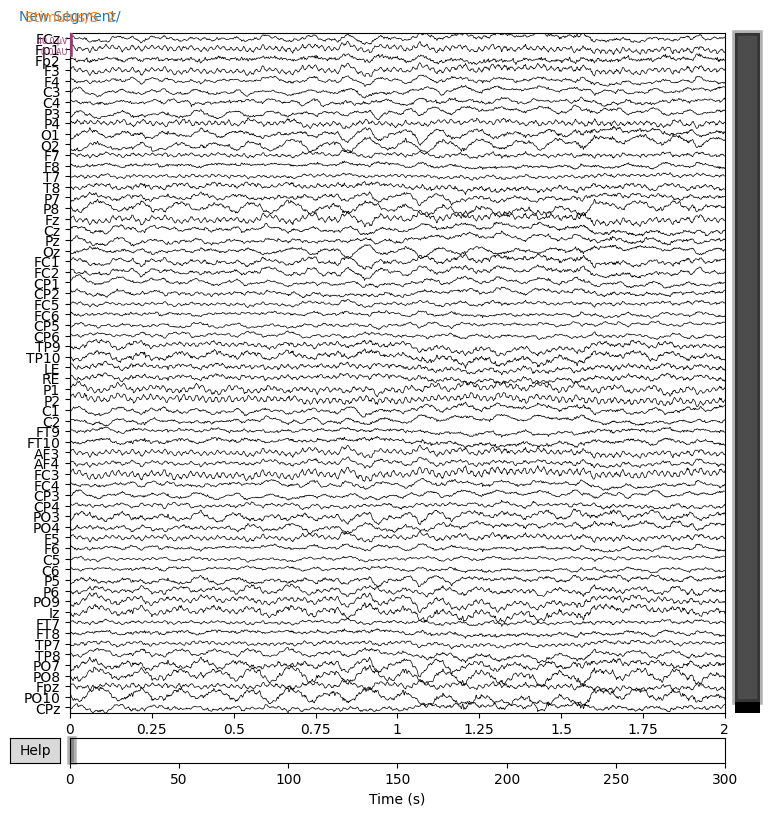

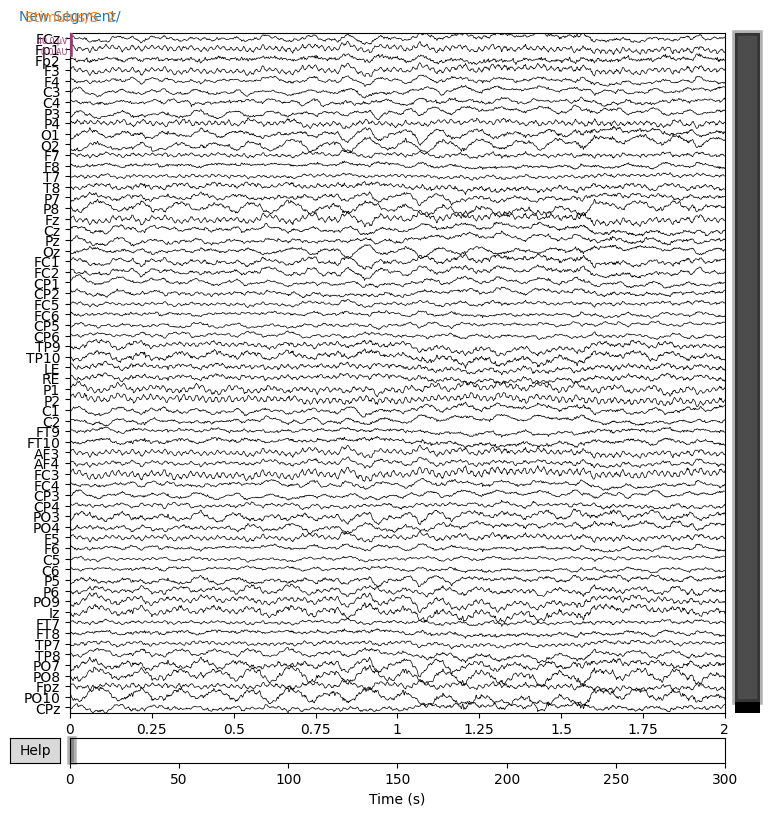

In [17]:
raw.plot(duration=2, n_channels=64)

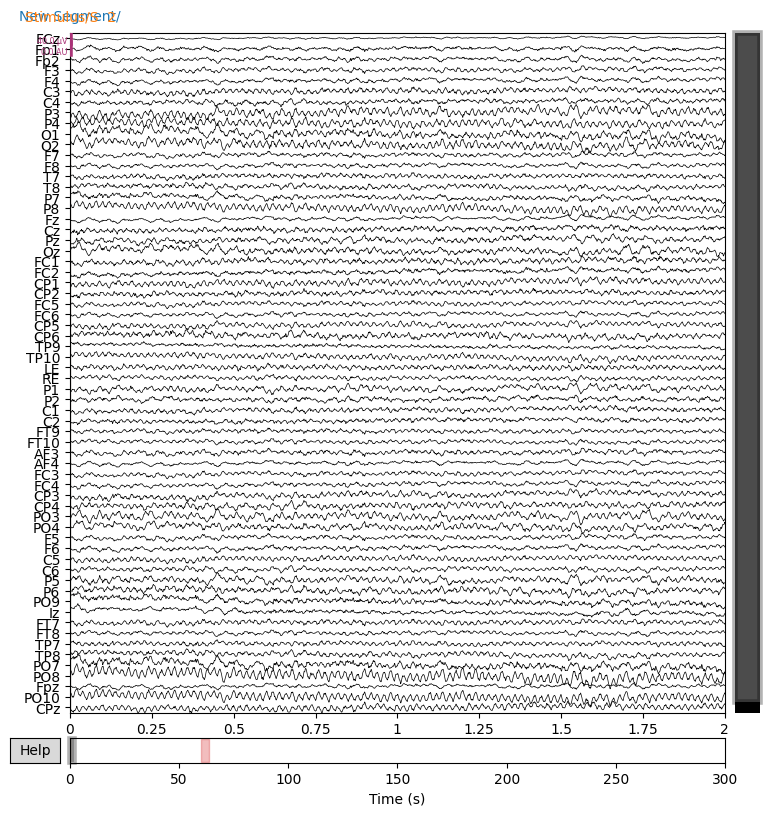

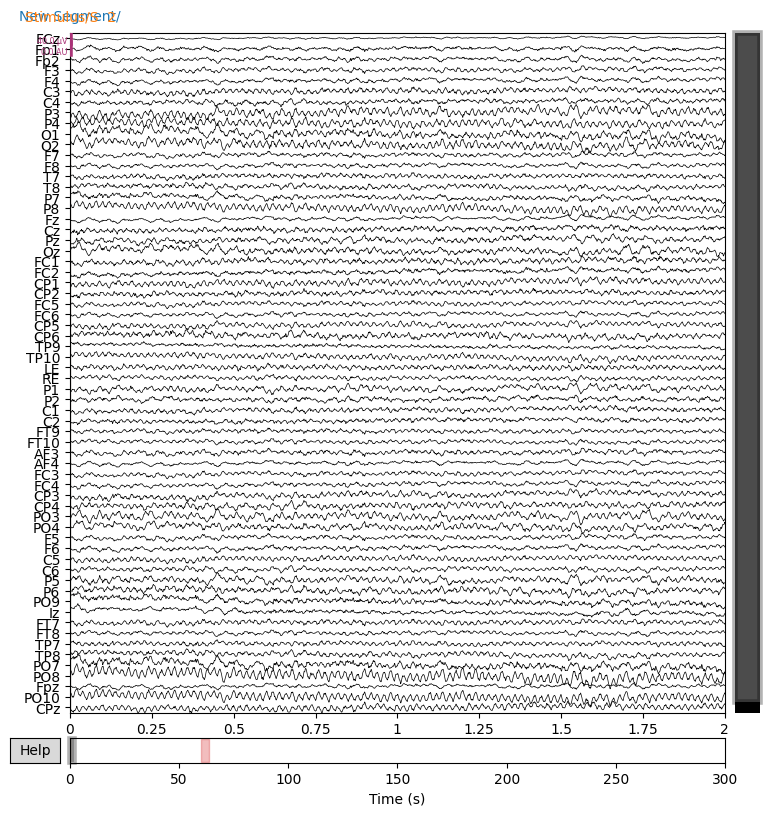

In [18]:
raw_healthy.plot(duration=2, n_channels=64)

In [19]:
diseases = ['chronic_back_pain', 'fibromyalgia', 'various']
len_of_data = {}
# absolute path to search all text files inside a specific folder
for disease in diseases:
    path = r'data/chronic_pain_patients/' + disease + '/preprocessed/*.vhdr'
    files = glob.glob(path)
    len_of_data[disease] = len(files)
    
path = r'data/healthy_controls/preprocessed/*.vhdr'
files = glob.glob(path)
len_of_data['healthy_controls'] = len(files) 

In [20]:
print(len_of_data)

{'chronic_back_pain': 34, 'fibromyalgia': 20, 'various': 47, 'healthy_controls': 88}


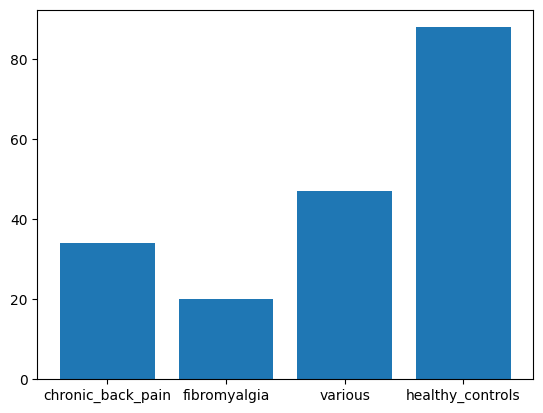

In [21]:
categories = list(len_of_data.keys())
count = list(len_of_data.values())

plt.bar(range(len(len_of_data)), count, tick_label=categories)
plt.show()

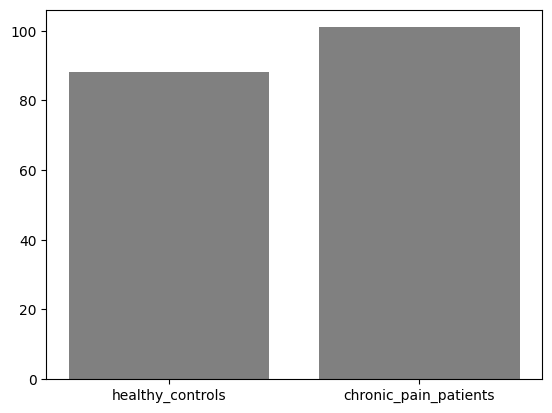

In [22]:
total_len_of_data = sum(len_of_data.values())
plt.bar(range(2), [len_of_data['healthy_controls'], total_len_of_data-len_of_data['healthy_controls']], tick_label=['healthy_controls', 'chronic_pain_patients'], color='grey')
plt.show()

In [29]:
df = pd.read_excel(r"/data0/practical-sose23/brain-age/data/clinical_data_updated_2020-08-04.ods", header=1, engine="odf")

In [30]:
df.head()

,Subject ID,Project prefix,Age(years),Sex (m/f),Pain duration(months),Avg. painIntensity (0 – 10),Curr. Pain Intensity(0 – 10),BDI,PDQ,MQS,VR-12 PCS,VR-12 MCS,PDI
0,VP02,chronic_back_pain,67,m,360.0,5.0,5.0,3.0,28.0,4.0,NaN,NaN,NaN
1,VP04,chronic_back_pain,54,f,120.0,5.0,4.0,35.0,14.0,31.7,NaN,NaN,NaN
2,VP05,chronic_back_pain,64,f,96.0,7.0,5.0,7.0,16.0,11.4,NaN,NaN,NaN
3,VP07,chronic_back_pain,41,m,22.0,6.0,7.0,15.0,22.0,6.1,NaN,NaN,NaN
4,VP08,chronic_back_pain,72,m,480.0,8.0,8.0,11.0,10.0,8.4,NaN,NaN,NaN


In [45]:
df.describe()

,Age(years),Pain duration(months),Avg. painIntensity (0 – 10),Curr. Pain Intensity(0 – 10),BDI,PDQ,MQS,VR-12 PCS,VR-12 MCS,PDI
count,101.000000,81.000000,80.000000,100.000000,100.000000,80.000000,101.000000,46.000000,46.000000,46.000000
mean,58.128713,121.790123,5.641250,5.234000,15.845000,17.431250,8.043069,31.773643,46.449620,27.391304
std,13.633535,114.374901,1.581915,1.913599,8.889244,6.454683,7.486535,7.787758,11.959153,14.199340
min,18.000000,7.000000,2.000000,0.500000,0.000000,4.000000,0.000000,9.448495,17.055158,0.000000
25%,50.000000,36.000000,4.875000,4.000000,10.000000,12.750000,0.000000,27.609809,38.369104,16.000000
50%,58.000000,84.000000,6.000000,5.000000,14.500000,18.000000,6.100000,31.034908,46.192842,28.500000
75%,68.000000,180.000000,7.000000,6.850000,22.000000,22.000000,12.000000,36.620276,56.314990,34.500000
max,86.000000,480.000000,9.000000,9.000000,42.000000,32.000000,31.700000,47.612678,69.198832,59.000000


In [60]:
# new_df = pd.Categorical(pd.factorize(df['Project prefix'])[0])

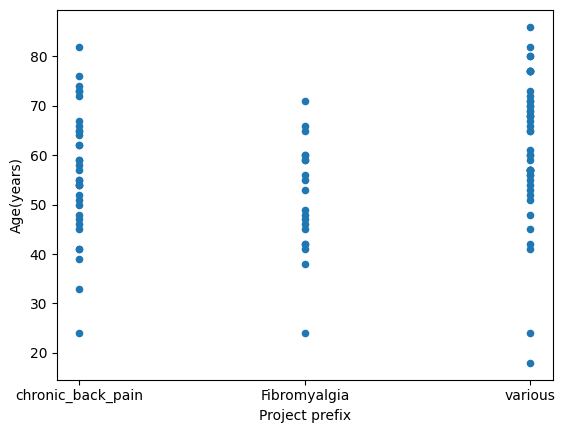

In [64]:
df.plot(x='Project prefix', y='Age(years)', kind='scatter')
plt.show()

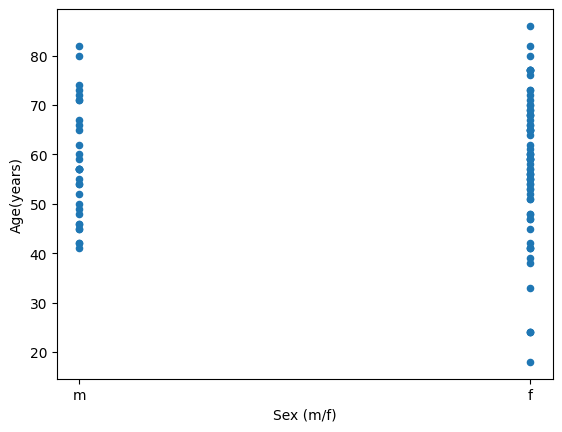

In [67]:
df.plot(x='Sex (m/f)', y='Age(years)', kind='scatter')
plt.show()

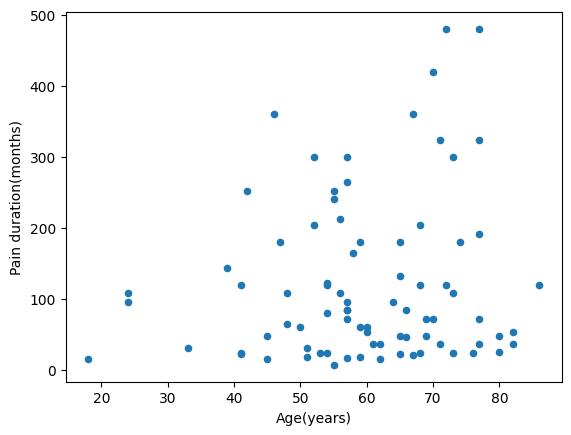

In [70]:
df.plot(y='Pain duration(months)', x='Age(years)', kind='scatter')
plt.show()

In [1]:
# df.plot(y='Pain duration(months)', x='Age(years)', kind='scatter')
# plt.show()